## Andy Castillo 18040
## Lab 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')

### Exploracion de Datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [4]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Pairplot con datos numericos

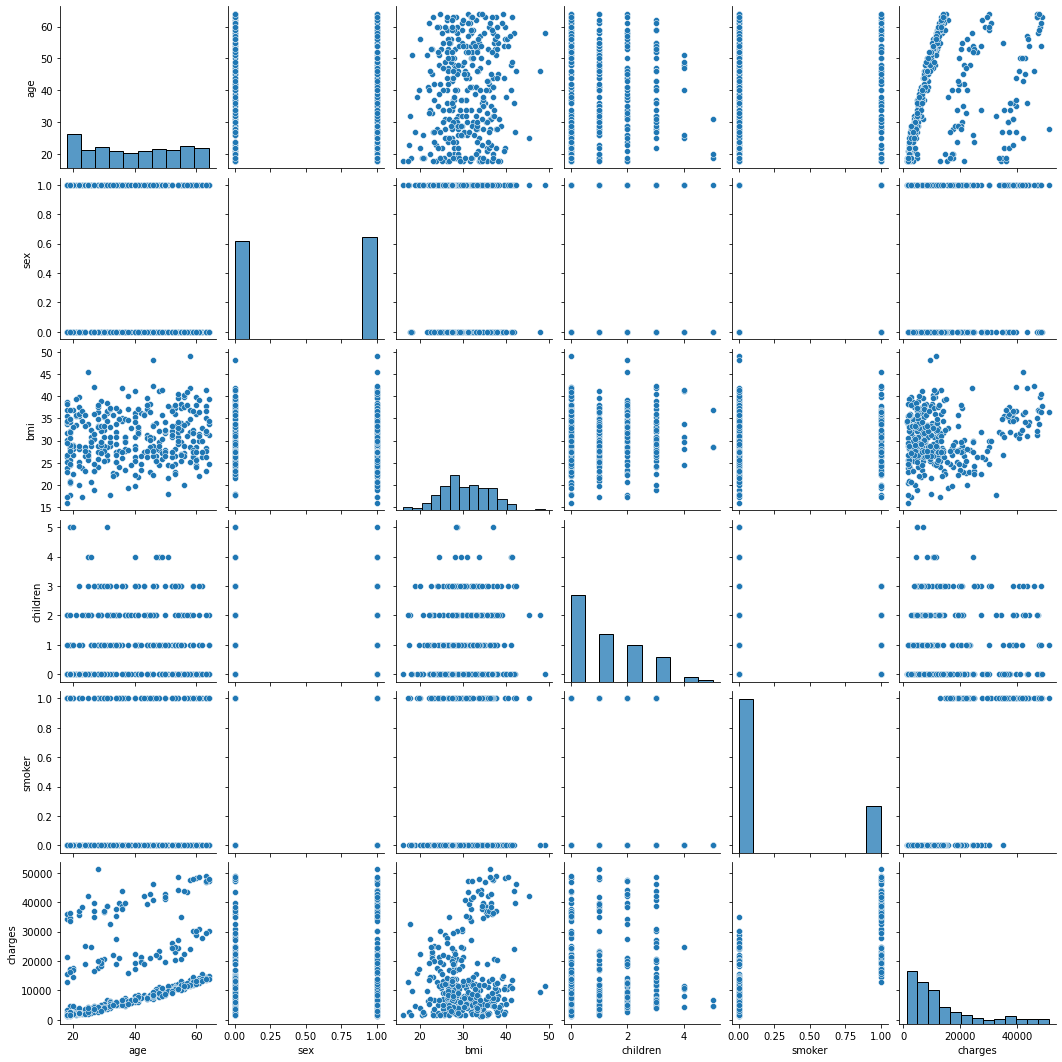

In [6]:
sns.pairplot(data[['age','sex','bmi','children','smoker','charges']])

#### Histogramas

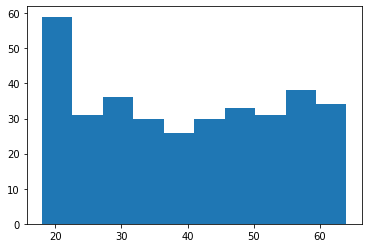

In [7]:
_ = plt.hist(data.age)

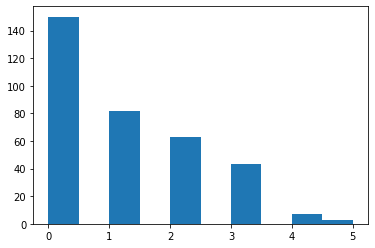

In [10]:
_ = plt.hist(data.children)

### Preparacion de los Datos

### Datos faltantes

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [12]:
data.count()

age         348
sex         348
bmi         348
children    348
smoker      348
region      348
charges     348
dtype: int64

#### No hay datos nulos

### Datos categoricos

In [16]:
LabelEncoder = preprocessing.LabelEncoder()

In [14]:
OneHotEncoder = preprocessing.OneHotEncoder()

In [17]:
LabelEncoder.fit(data['sex'])
LabelEncoder.fit(data['smoker'])

LabelEncoder()

In [18]:
OneHotEncoder.fit(data[['region']])

OneHotEncoder()

### Dividir Data

In [19]:
target = data['charges']

In [20]:
data = data.drop(columns=['charges'])

In [21]:
data = data[['bmi']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

### Escala

In [23]:
scaler = preprocessing.StandardScaler()

In [24]:
scaler.fit(data)

StandardScaler()

### Modelacion Lineal

#### Modelo 1

In [38]:
x_mean = np.mean(X_train.values)
y_mean = np.mean(y_train.values)

n = len(X_train)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    denominator += (X_train.values[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)


In [39]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X_train.values[i]
    rmse += (y_train.values[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print('RMSE: ',rmse)

RMSE:  [12738.51422372]


In [27]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X_train.values[i]
    sumofsquares += (y_train.values[i] - y_mean) ** 2
    sumofresiduals += (y_train.values[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.05246451]


#### Modelo 2

In [28]:
regression = LinearRegression()

In [29]:
regression.fit(X_train, y_train)

LinearRegression()

#### Modelo 3

In [30]:
lasso = Lasso(alpha=0.1)

In [31]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

### Evaluacion de los Modelos

In [52]:
regression.coef_

array([539.45130822])

In [53]:
lasso.coef_

array([539.44806932])

In [32]:
mean_absolute_error(regression.predict(X_test), y_test)

9570.712933666073

In [33]:
mean_squared_error(regression.predict(X_test), y_test)

132593870.06314155

In [34]:
r2_score(regression.predict(X_test), y_test)

-12.873490757416796

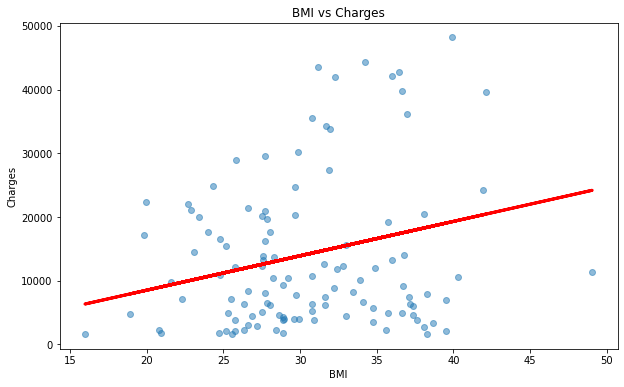

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['bmi'], y_test, alpha=0.5)

plt.plot(X_test, regression.predict(X_test), color='red', linewidth=3)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Regresion Polinomial

In [40]:
poly = PolynomialFeatures()

In [41]:
poly_train = poly.fit_transform(X_train)

In [42]:
poly_test = poly.fit_transform(X_test)

In [43]:
pl = LinearRegression()

In [44]:
pl.fit(poly_train, y_train)

LinearRegression()

In [48]:
print(mean_squared_error(pl.predict(poly_train), y_train))

161706243.90568784


In [47]:
print(r2_score(pl.predict(poly_train), y_train))

-15.935631374852626


In [49]:
print(mean_squared_error(pl.predict(poly_test), y_test))

133996853.9990682


In [50]:
print(r2_score(pl.predict(poly_test), y_test))

-11.742617277441898


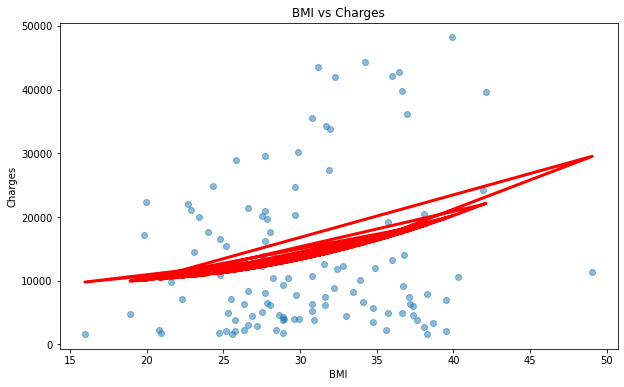

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.5)

plt.plot(X_test, pl.predict(poly_test), color='red', linewidth=3)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()